In [25]:
%matplotlib inline
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Chapter 7: Estimation

1. Estimators
2. Likelihood
3. Sampling distributions

# Estimators
## The problem

**Probablity distributions** have parameters and in the ideal world they will be calculated by measuring ever point in the population. **We would need serious £££ to do this!**

## The solution
**sample** then **estimate**

Given:
1. $\{ x_1, x_2, ..., x_n \} \in$ Population
2. Population is modelled well by some PDF $P$

Determine the paramter estimates ($\overline{\omega}_1, \overline{\omega}_2,... \overline{\omega}_n$) that most accuately explains the sample.

## Estimator
A function that goes from a sample $\{ x_1, x_2, ..., x_n \}$ to a single paramter $\overline{\omega}$.

## Estimate
The paramter $\overline{\omega}$

## Example
Here's a sample of numbers from the Exponential distribution:

$$\{ 19.34, 5.43, 12.23, 2.45 \}$$

What is the parameter $\lambda$ of this distribution?

## Example
$\{ {x_1, x_2, ..., x_n} \} \sim \mathcal{N}(\mu,\,\sigma^2)$

What are $\mu,\,\sigma^2$?

## Example
What is the height of men living in Europe?

In [26]:
sample = np.random.normal(loc=np.random.uniform(1.4, 1.6),
                          scale=np.random.uniform(0.5, 1),
                          size=6)
for x in sample:
    print(x)

1.73083909576
1.19059523949
1.45125216589
2.05936414128
1.62017901119
2.09627997616


How can we estimate the population mean $\mu$ and variance $\sigma^2$?

Two answers:

1. Intuitive
2. Mathematical

## Intuitive?

### How well does the intuitive way work?

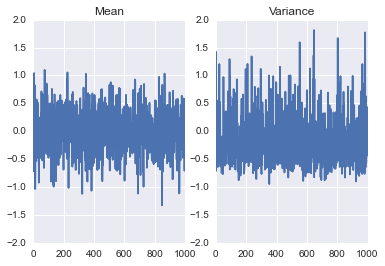

In [40]:
n_trials = 1000
mean_error = np.zeros(n_trials)
var_error = np.zeros(n_trials)
for i in xrange(n_trials):
    mean = np.random.uniform(1.4, 1.6)
    var = np.random.uniform(0.5, 1)
    n = 5
    sample = np.random.normal(loc=mean,
                              scale=np.sqrt(var),
                              size=n)
    mean_error[i] = np.mean(sample) - mean
    var_error[i] = np.var(sample) - var

fig, ax = plt.subplots(1,2)
ax[0].plot(mean_error)
ax[0].set_title('Mean')
ax[0].set_ylim(-2, 2)
ax[1].plot(var_error)
ax[1].set_title('Variance')
ax[1].set_ylim(-2, 2);

In [41]:
np.mean(mean_error)

0.0017095444416182649

In [42]:
np.mean(var_error)

-0.16139666900011376

Mean looks pretty good but variance is underestimated. Does this effect depend on sample size?

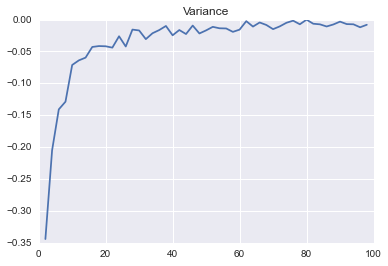

In [30]:
sample_sizes = range(2, 100, 2)
var_error = np.zeros(len(sample_sizes))
for i, sample_size in enumerate(sample_sizes):
    e = []
    for j in xrange(500):
        mean = np.random.uniform(1.4, 1.6)
        var = np.random.uniform(0.5, 1)
        n = sample_size
        sample = np.random.normal(loc=mean,
                                  scale=np.sqrt(var),
                                  size=n)
        e.append(np.var(sample) - var)
    var_error[i] = np.mean(e)

plt.plot(sample_sizes, var_error)
plt.title('Variance');

# Likelihood
Why does the intuition work (not work)? The likelihood function can help us here.

The probabilty of a sample point $x_1$ drawn from a Normal distribution is:

$$
P(x_1 \mid \mu,\,\sigma^2)
$$

The probability of two consecutive sample points $x_1$, $x_2$ is:

$$
P(\{x_1, x_2 \} \mid \mu,\,\sigma^2) = P(x_1 \mid \mu,\,\sigma^2) \cdot P(x_2 \mid \mu,\,\sigma^2)
$$

For $n$ **independently and identically drawn (iid)** sample points, 

$$
P(\{x_1, x_2, ... , x_n \} \mid \mu,\,\sigma^2) = \prod_i^n P(x_i \mid \mu,\,\sigma^2)
$$

Consider now $\mu,\,\sigma^2$ as parameters to tune to maximize the probability of $\{x_1, x_2, ... , x_n \}$, this is the likelihood function:

$$
\mathcal{L}(\mu,\sigma^2)
=\prod_i^n P(x_i \mid \mu,\,\sigma^2)
$$

$$
\ln\mathcal{L}(\mu,\sigma^2)
= \sum_{i=1}^n \ln P(x_i \mid \,\mu,\sigma^2)
= -\frac{n}{2}\ln(2\pi) - \frac{n}{2}\ln\sigma^2 - \frac{1}{2\sigma^2}\sum_{i=1}^n (x_i-\mu)^2.
$$

# Maximum Likelihood Estimate
To find the $\mu$ that maximizes the probability, differentiate with respect to $\mu$ and solve for $\mu$ to find:

$$
\mu_{ML} = \sum_{i=1}^n x_i
$$

Similarly for $\sigma^2$

$$
\sigma^2_{ML} = \frac{1}{n}\sum_{i=1}^n (x_i - \mu_{ML})^2
$$

Consider now the expectations of these quantitites with respect to all possible sample points $x_i$ and we get:

$$
\mathbb{E}[\mu_{ML}] = \mu
$$

$$
\mathbb{E}[\sigma^2_{ML}]  = \frac{n-1}{n}\sigma^2
$$

What this means is that on average, the maximum likelihood will underestimate the variance by a factor of $\frac{n-1}{n}$.

What is happening here is that $\sigma^2_{ML}$ relies upon $\mu_{ML}$. This leads to bias because:

$$
\begin{align}
\mathbb{E}[\sigma^2_{ML}]
    &= \mathbb{E}\bigg[ \frac{1}{n}\sum_{i=1}^n (x_i-\mu_{ML})^2 \bigg]
     < \mathbb{E}\bigg[ \frac{1}{n}\sum_{i=1}^n (x_i-\mu)^2 \bigg]  = \sigma^2.
\end{align}
$$

In [43]:
#Draw some plots for a sample. Use the normal dist function from an earlier notebook.

In [31]:
def L(mean, var, sample):
    n = len(sample)
    return -n/2. * np.log2(2 * np.pi) - \
            n/2. * np.log2(2 * var) - \
            1/(2 * var) * np.sum((sample - mean)**2)

The sample variance $S^2$ is underestimated because the sample mean $\bar x$will generally not be equal the true mean $\mu$.